9002


<IPython.core.display.Javascript object>


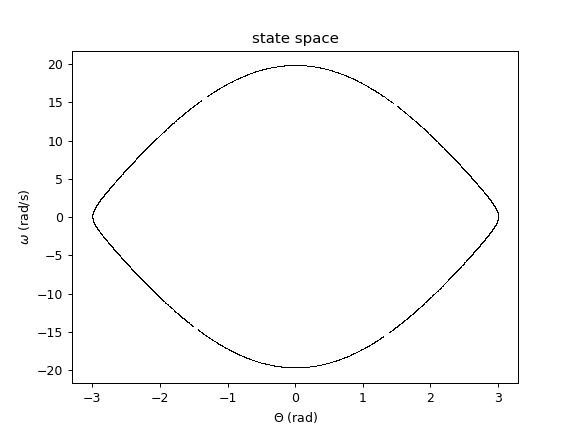

In [166]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

theta_values = []
omega_values = []

#runge kutta 4th order

# theta dot
def f(t, omega, theta):
    return omega

# theta double dot
def g(t, omega, theta):
    A = 0.0
    alpha = 0.0
    B = 0.0
    l = 0.1
    m = 0.1
    grav = 9.8
    return 1 / (m * l) * (-B * l * omega - m * grav * np.sin (theta) + A * np.cos (alpha * t))

def half_steps(dt, t, theta, omega):
    
    dt = dt/2
    
    for x in range(2): 
        k1 = f(t, omega, theta)
        l1 = g(t, omega, theta)
        
        k2 = f(t + dt / 2, omega + l1 * dt / 2, theta + k1 * dt / 2)
        l2 = g(t + dt / 2, omega + l1 * dt / 2, theta + k1 * dt / 2)
        
        k3 = f(t + dt / 2, omega + l2 * dt / 2, theta + k2 * dt / 2)
        l3 = g(t + dt / 2, omega + l2 * dt / 2, theta + k2 * dt / 2)
        
        k4 = f(t + dt, omega + l3 * dt, theta + k3 * dt)
        l4 = g(t + dt, omega + l3 * dt, theta + k3 * dt)
        
        theta = theta + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        omega = omega + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4) 
        t += dt
        
    return theta, omega, t
      
def rk4_adapt(t0, theta0, omega0, steps, dt, tol):
    t = t0
    theta = theta0
    omega = omega0
    count = 0
    count2 = 0
    while steps > count:
        

        k1 = f(t, omega, theta)
        l1 = g(t, omega, theta)
        
        k2 = f(t + dt / 2, omega + l1 * dt / 2, theta + k1 * dt / 2)
        l2 = g(t + dt / 2, omega + l1 * dt / 2, theta + k1 * dt / 2)
        
        k3 = f(t + dt / 2, omega + l2 * dt / 2, theta + k2 * dt / 2)
        l3 = g(t + dt / 2, omega + l2 * dt / 2, theta + k2 * dt / 2)
        
        k4 = f(t + dt, omega + l3 * dt, theta + k3 * dt)
        l4 = g(t + dt, omega + l3 * dt, theta + k3 * dt)
        
        theta_full = theta + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        omega_full = omega + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        
        theta_half, omega_half, t_half = half_steps(dt, t, theta, omega)
        
        #print(abs(theta_full - theta_half))
       # print(tol)
        
        if max(abs(theta_full - theta_half), abs(omega_full - omega_half)) <= tol:
            t += dt
            theta = theta_full
            omega = omega_full
            theta_values.append(theta)
            omega_values.append(omega)
            dt = dt * 2 
            count += 1
        else:
            dt = dt/2
            count2 += 1
    print(count2) 
    plt.plot(theta_values,omega_values,'k,')

    plt.title('state space')
    plt.xlabel('$\Theta$ (rad)')
    plt.ylabel('$\omega$ (rad/s)')
    #plt.savefig('Q2a.png')
    

t0 = 0
steps = 9000
theta0 = 3.0
omega0 = .1
dt = .1
tol = .00001
rk4_adapt(t0, theta0, omega0, steps, dt, tol)

In [69]:
max(abs(-1), abs(-2))

2

<IPython.core.display.Javascript object>


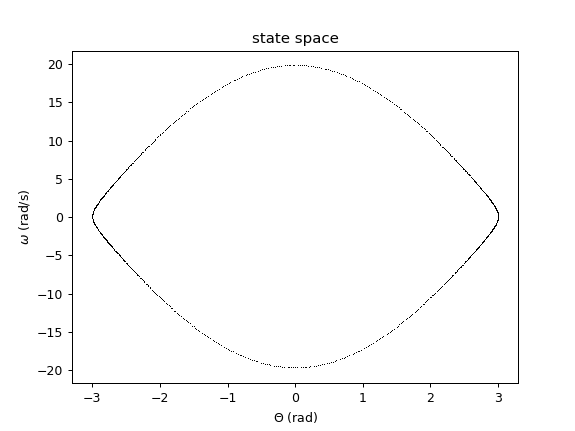

In [113]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

theta_values = []
omega_values = []

#runge kutta 4th order

# theta dot
def f(t, theta, omega):
    return omega

# theta double dot
def g(t, omega, theta):
    A = 0.0
    alpha = 0.0
    B = 0.0
    l = 0.1
    m = 0.1
    grav = 9.8
    return 1 / (m * l) * (-B * l * omega - m * grav * np.sin (theta) + A * np.cos (alpha * t))
      
def rk4(t0, theta0, omega0, steps, dt):
    t = t0
    theta = theta0
    omega = omega0
    count = 0
    
    while steps > count:
        
        theta_values.append(theta)
        omega_values.append(omega)
        
        k1 = f(t, theta, omega)
        l1 = g(t, omega, theta)
        
        k2 = f(t + dt / 2, theta + k1 * dt / 2, omega + l1 * dt / 2)
        l2 = g(t + dt / 2, omega + l1 * dt / 2, theta + k1 * dt / 2)
        
        k3 = f(t + dt / 2, theta + k2 * dt / 2, omega + l2 * dt / 2)
        l3 = g(t + dt / 2, omega + l2 * dt / 2, theta + k2 * dt / 2)
        
        k4 = f(t + dt, theta + k3 * dt, omega + l3 * dt)
        l4 = g(t + dt, omega + l3 * dt, theta + k3 * dt)
        
        theta = theta + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        omega = omega + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        
        #print('omega:', omega)
        #print('theta:', theta)
        #print('time:', t)
        count += 1
        t += dt
        
    
        
    plt.plot(theta_values,omega_values,'k,')

    plt.title('state space')
    plt.xlabel('$\Theta$ (rad)')
    plt.ylabel('$\omega$ (rad/s)')
    #plt.savefig('Q2a.png')

t0 = 0
steps = 1000       
theta0 = 3.0
omega0 = .1
dt = .01
rk4(t0, theta0, omega0, steps, dt)

x_half -5.617697407946275
x_full -9.099135466666668
x_half -3.0718884409555605
x_full -11.155335475
x_half -1.3033179712430134
x_full -12.256562616666667
x_half -0.22524185938272523
x_full -12.702931631704711
x_half 0.368649128439111
x_full -12.874286140180438
x_half 0.6796487239256794
x_full -12.943388133877246
x_half 0.8386599065743592
x_full -12.973323956569505
x_half 0.9190396545468074
x_full -12.987078095272267
x_half 0.9594473709622207
x_full -12.993644161512458
x_half 0.9797055872538868
x_full -12.99684849505438
x_half 0.989848271118066
x_full -12.998430868095912
x_half 0.994923005191991
x_full -12.99921709131538
x_half 0.9974612200370195
x_full -12.999608960240261
x_half 0.9987305393828803
x_full -12.999804583798992
x_half 0.999365252033048
x_full -12.999902317823365
x_half 0.9996826216019905
x_full -12.999951165393169
x_half 0.99984130969737
x_full -12.99997558431702
x_half 0.9999206545727797
x_full -12.999987792563628
x_half 0.9999603272174136
x_full -12.999993896383094
x_hal

<IPython.core.display.Javascript object>


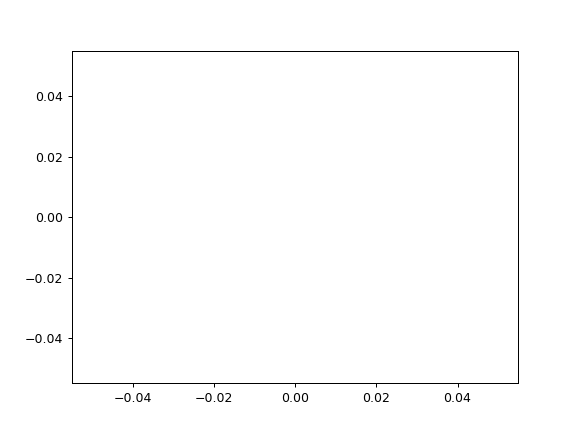

In [165]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x_values = []
y_values = []
z_values = []

#runge kutta 4th order

# x dot
def f(t, x, y, z):
    a = 16
    return a*(y-x) 

# y dot
def g(t, x, y, z):
    r = 45
    return r * x - y - x * z

# z dot
def h(t, x, y, z):
    b = 4
    return x * y - b * z
    
def half_steps(dt, t, x ,y, z):
    
    dt = dt/2
    
    for x in range(2): 
        k1 = f(t, x, y, z)
        l1 = g(t, x, y, z)
        m1 = h(t, x, y ,z)
        
        k2 = f(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        l2 = g(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        m2 = h(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
                
        k3 = f(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        l3 = g(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        m3 = h(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        
        k4 = f(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        l4 = g(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        m4 = h(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        
        x = x + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y = y + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        z = z + dt / 6 * (m1 + 2 * m2 + 2 * m3 + m4)        
        t += dt
        
    return x, y, z
      
def rk4_adapt(t0, x0, y0, z0, steps, dt, tol):
    t = t0
    x = x0
    y = y0
    z = z0
    count = 0
    count2 = 0
    while steps > count and count2 < steps:
        
        k1 = f(t, x, y, z)
        l1 = g(t, x, y, z)
        m1 = h(t, x, y ,z)
        
        k2 = f(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        l2 = g(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        m2 = h(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
                
        k3 = f(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        l3 = g(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        m3 = h(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        
        k4 = f(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        l4 = g(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        m4 = h(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        
        x_full = x + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y_full = y + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        z_full = z + dt / 6 * (m1 + 2 * m2 + 2 * m3 + m4)
        
        x_half, y_half, z_half = half_steps(dt, t, x, y, z)
        
        print('x_half', x_half)
        print('x_full', x_full)
        
        
        if max(abs(x_full - x_half), abs(y_full - y_half), abs(z_full - z_half)) <= tol:
            t += dt
            x = x_full
            y = y_full
            z = z_full
            x_values.append(x)
            y_values.append(y)
            z_values.append(z)
            dt = dt * 2 
            count += 1
        else:
            dt = dt/2
            count2 += 1
     
    #fig = plt.figure()
    #ax = plt.axes(projection = '3d')
    
    #ax.scatter(x_values,y_values,z_values, c = 'k')
    #plt.show()
    
    plt.plot(x_values,y_values,'k,')

    
init = [-13, -12, 52]
t0 = 0
steps = 100
dt = .1
tol = .00001
rk4_adapt(t0, init[0], init[1], init[2], steps, dt, tol)

<IPython.core.display.Javascript object>


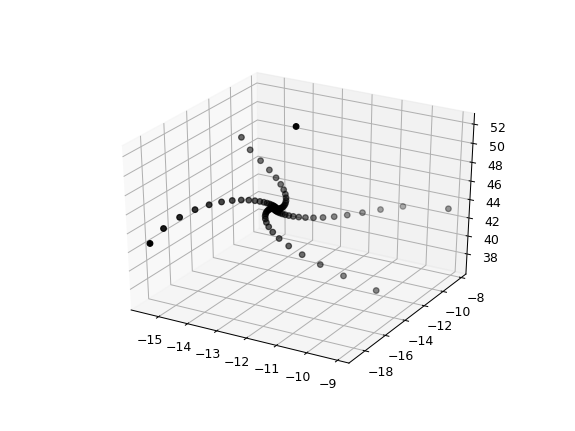

In [147]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x_values = []
y_values = []
z_values = []

#runge kutta 4th order

# x dot
def f(t, x, y, z):
    a = 16
    return a * (y - x) 

# y dot
def g(t, x, y, z):
    r = 45
    return r * x - y - x * z

# z dot
def h(t, x, y, z):
    b = 4
    return x * y - b * z

      
def rk4_adapt(t0, x0, y0, z0, steps, dt, tol):
    t = t0
    x = x0
    y = y0
    z = z0
    count = 0
    count2 = 0
    while steps > count :
        
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)
        
        k1 = f(t, x, y, z)
        l1 = g(t, x, y, z)
        m1 = h(t, x, y ,z)
        
        k2 = f(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        l2 = g(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        m2 = h(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
                
        k3 = f(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        l3 = g(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        m3 = h(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        
        k4 = f(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        l4 = g(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        m4 = h(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        
        x = x + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y = y + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        z = z + dt / 6 * (m1 + 2 * m2 + 2 * m3 + m4)
        
        count += 1
     
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter(x_values,y_values,z_values, c = 'k')
    plt.show()

    #ax.plot(x, z, 'r+', zdir='y', zs=1.5)
    #ax.plot(y, z, 'g+', zdir='x', zs=-0.5)
    #ax.plot(x, y, 'k+', zdir='z', zs=-1.5)
    #plt.savefig('Q2a.png')
    
init = [-13, -12, 52]
t0 = 0
steps = 10000
dt = .1
tol = .00001
rk4_adapt(t0, init[0], init[1], init[2], steps, dt, tol)

In [153]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x_values = []
y_values = []
z_values = []

#runge kutta 4th order

# x dot
def f(t, x, y, z):
    a = 16
    return a * (y - x) 

# y dot
def g(t, x, y, z):
    r = 45
    return r * x - y - x * z

# z dot
def h(t, x, y, z):
    b = 4
    return x * y - b * z

def half_steps(dt, t, x ,y, z):
    
    dt = dt/2
    
    for x in range(2): 
        k1 = f(t, x, y, z)
        l1 = g(t, x, y, z)
        m1 = h(t, x, y ,z)
        
        k2 = f(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        l2 = g(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        m2 = h(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
                
        k3 = f(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        l3 = g(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        m3 = h(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        
        k4 = f(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        l4 = g(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        m4 = h(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        
        x = x + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y = y + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        z = z + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        t += dt
        
    return x, y, z

      
def rk4_adapt(t0, x0, y0, z0, steps, dt, tol):
    t = t0
    x = x0
    y = y0
    z = z0
    count = 0
    count2 = 0
    while steps > count :
        
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)
        
        k1 = f(t, x, y, z)
        l1 = g(t, x, y, z)
        m1 = h(t, x, y ,z)
        
        k2 = f(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        l2 = g(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        m2 = h(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
                
        k3 = f(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        l3 = g(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        m3 = h(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        
        k4 = f(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        l4 = g(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        m4 = h(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        
        x_full = x + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y_full = y + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        z_full = z + dt / 6 * (m1 + 2 * m2 + 2 * m3 + m4)
        
        x_half, y_half, z_half = half_steps(dt, t, x, y, z)

        
        if max(abs(x_full - x_half), abs(y_full - y_half), abs(z_full - z_half)) <= tol:
            t += dt
            x = x_full
            y = y_full
            z = z_full
            x_values.append(x)
            y_values.append(y)
            z_values.append(z)
            dt = dt * 2 
            count += 1
        else:
            dt = dt/2
            count2 += 1
            
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter(x_values,y_values,z_values, c = 'k')
    plt.show()

    #ax.plot(x, z, 'r+', zdir='y', zs=1.5)
    #ax.plot(y, z, 'g+', zdir='x', zs=-0.5)
    #ax.plot(x, y, 'k+', zdir='z', zs=-1.5)
    #plt.savefig('Q2a.png')
    
init = [-13, -12, 52]
t0 = 0
steps = 100
dt = .1
tol = .00001
rk4_adapt(t0, init[0], init[1], init[2], steps, dt, tol)

KeyboardInterrupt: 